<a href="https://colab.research.google.com/github/donggale72/10000.html/blob/main/ch05_07_%EA%B8%B0%EC%B4%88%EB%AA%A8%EB%8D%B8%EA%B5%AC%ED%98%84_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch05.07. 기초모델 구현 - Logistic Regression
---
* 날짜:
* 이름:

## 학습내용
    - 로지스틱 회귀 프로세스에 대해 이해한다
    - 시그모이드 함수를 구현한다

```
import numpy as np
import matplotlib.pyplot as plt
```

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/content/drive/MyDrive/데이터사이언스과정/05.머신러닝기반데이터분석')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 클래스 작성
---

In [ ]:
class LogisticRegressionGD():
  def __init__(self, lr=0.001, random_state=1):
    self.lr=lr
    self.seed = np.random.RandomState(random_state)

  def init_weights(self, X):
    size=X.shape[1]
    self.w=self.seed.normal(0,0.01,size+1)
  
  def model(self, X): #모형
    z=np.dot(X,self.w[:-1])+self.w[-1]
    y_hat =self.sigmoid(z)
    return y_hat
    

  def predict(self, X):# 예측값 1 또는 0
    y_hat=np.where(self.model(X) >= 0.5, 1, 0) 
    return y_hat

  def loss(self, y, y_hat):# 손실함수
    L = -1/len(y)*np.sum(y*np.log(y_hat)+(1-y)*(np.log(1-y_hat)))
    return L

  def sigmoid(self, X): #로지스틱 함수(시그모이드)
    return 1 / (1+np.exp(-X))
    

  def accuracy(self, y,y_hat): #정확도
    return np.count_nonzero(y_hat==y)/len(y)
    
  def evaluate(self, X, y): #평가
    y_hat=self.model(X)
    loss = self.loss(y,y_hat)
    y_logit = self.predict(X)
    acc=self.accuracy(y,y_logit)
    return loss, acc

  def fit(self, X, y, epochs=10, show_params=False):

    self.init_weights(X) # 가중치 초기화
    self.history=dict(loss=[], acc=[]) # history 초기화

    for epoch in range(epochs):    
      # 최적화 1
      
      #for xi, yi in zip(X, y):
        #y_hat=self.model(xi)
        #self.w[:-1]+=self.lr*np.sum((yi-y_hat)*xi)
        #self.w[-1]+=self.lr*np.sum(yi-y_hat)

      # 최적화 2
      y_hat = self.model(X)
      self.w[:-1]+= self.lr * np.dot(X.T , (y-y_hat))
      self.w[-1] += self.lr * np.sum(y-y_hat)

      
      # 평가 및 결과 저장
      loss, acc = self.evaluate(X, y)
      self.history['loss'].append(loss)
      self.history['acc'].append(acc)
      print(f'[Epoch {epoch}] loss: {np.round(loss,2)}  acc: {np.round(acc,2)}')
      if show_params: print(self.w)

  # 데이터 흐름 시각화
  def draw_dflow(self, X, y, title='', figsize=(8,4)):
    plt.figure(figsize=figsize)
    plt.title(title)
    
    y_hat = self.model(X)
    y_pred = self.predict(X)
    plt.plot(y, label='y', marker='o')
    plt.plot(y_hat, label='$\hat{y}$', marker='.', linestyle='--')
    plt.plot(y_pred, label='$\logit$', marker='.', linestyle='--')
    plt.legend()
    plt.show()

  # 학습 곡선 시각화
  def draw_lcurve(self, title='', figsize=(8,4)):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.plot(self.history['acc'], label='acc', marker='o')
    plt.plot(self.history['loss'], label='loss', marker='o')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()






## iris 데이터로 분류 진행
---

### **데이터 로드**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

def iris_loader(n_class, test_size=0.2, rs=1):
  iris = load_iris()
  X = iris.data
  y = iris.target
  print(X.shape, y.shape, X[0], y[0])
  
  if n_class==2:
    X = X[y!=2]
    y = y[y!=2]
    y = np.where(y==1, 1, 0)
  if n_class==3:
    ohe = OneHotEncoder(sparse=False)
    y = ohe.fit_transform(np.expand_dims(y,1))
  
  X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=rs)
   
  print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = iris_loader(2)

(150, 4) (150,) [5.1 3.5 1.4 0.2] 0
(75, 4) (25, 4) (75,) (25,)


In [ ]:
model.w

array([-3.0091537 , -8.66257956, 12.45385095,  5.42977921, -1.64787667])

### **학습전 성능 평가**

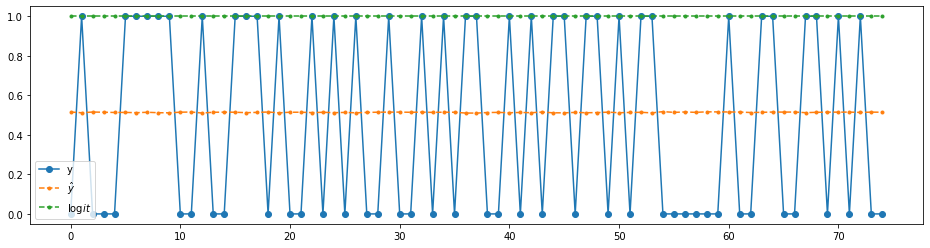

성능:  (0.6971611251403647, 0.4666666666666667)


In [ ]:
model = LogisticRegressionGD()

model.init_weights(X_train)
model.draw_dflow(X_train, y_train, figsize=(16,4))
print('성능: ', model.evaluate(X_train, y_train))

### **학습**

In [ ]:
history = model.fit(X_train, y_train, epochs=50)

[Epoch 0] loss: 0.66  acc: 0.47
[Epoch 1] loss: 0.63  acc: 0.96
[Epoch 2] loss: 0.6  acc: 1.0
[Epoch 3] loss: 0.58  acc: 1.0
[Epoch 4] loss: 0.55  acc: 1.0
[Epoch 5] loss: 0.53  acc: 1.0
[Epoch 6] loss: 0.5  acc: 1.0
[Epoch 7] loss: 0.48  acc: 1.0
[Epoch 8] loss: 0.46  acc: 1.0
[Epoch 9] loss: 0.45  acc: 1.0
[Epoch 10] loss: 0.43  acc: 1.0
[Epoch 11] loss: 0.41  acc: 1.0
[Epoch 12] loss: 0.4  acc: 1.0
[Epoch 13] loss: 0.38  acc: 1.0
[Epoch 14] loss: 0.37  acc: 1.0
[Epoch 15] loss: 0.36  acc: 1.0
[Epoch 16] loss: 0.35  acc: 1.0
[Epoch 17] loss: 0.34  acc: 1.0
[Epoch 18] loss: 0.33  acc: 1.0
[Epoch 19] loss: 0.32  acc: 1.0
[Epoch 20] loss: 0.31  acc: 1.0
[Epoch 21] loss: 0.3  acc: 1.0
[Epoch 22] loss: 0.29  acc: 1.0
[Epoch 23] loss: 0.28  acc: 1.0
[Epoch 24] loss: 0.27  acc: 1.0
[Epoch 25] loss: 0.27  acc: 1.0
[Epoch 26] loss: 0.26  acc: 1.0
[Epoch 27] loss: 0.25  acc: 1.0
[Epoch 28] loss: 0.25  acc: 1.0
[Epoch 29] loss: 0.24  acc: 1.0
[Epoch 30] loss: 0.24  acc: 1.0
[Epoch 31] loss: 0.2

### **학습 후 성능평가**

성능:  (0.16292354954830843, 1.0)


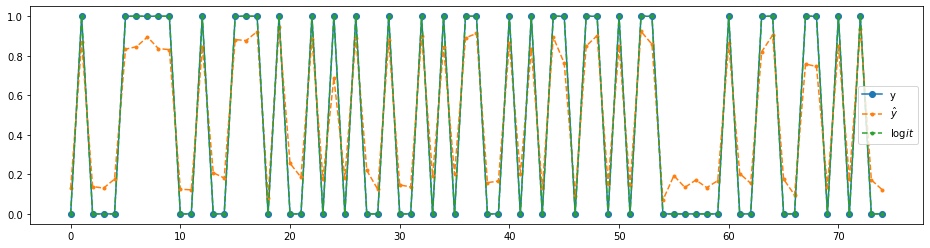

In [ ]:
print('성능: ', model.evaluate(X_train, y_train))
model.draw_dflow(X_train, y_train, figsize=(16,4))

### **테스트셋 성능평가**

성능:  (0.15268401285829275, 1.0)


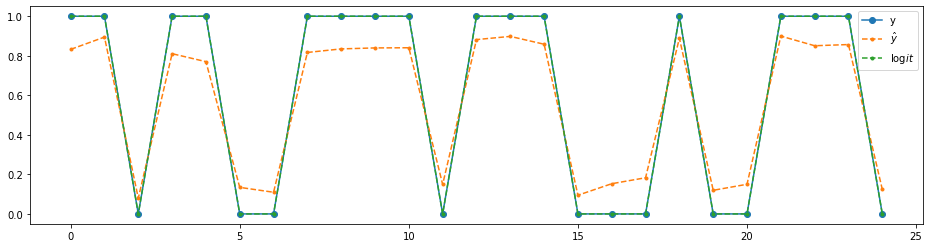

In [ ]:
print('성능: ', model.evaluate(X_test, y_test))
model.draw_dflow(X_test, y_test, figsize=(16,4))

### **학습곡선**

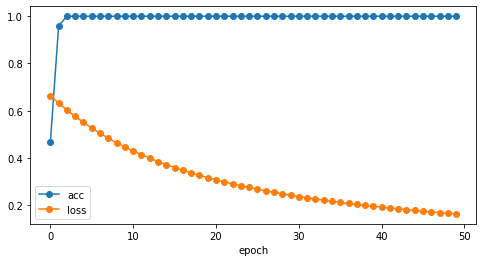

In [ ]:
model.draw_lcurve()

### **하이퍼파라미터에 따른 성능평가**

In [ ]:
for lr in [0.00001, 0.0001, 0.001, 0.01, 0.1]:
  model = LogisticRegressionGD(lr=lr)
  history = model.fit(X_train, y_train, epochs=10)
  print(f'===== lr {lr} ==== {model.evaluate(X_test, y_test)}')

[Epoch 0] loss: 0.7  acc: 0.47
[Epoch 1] loss: 0.7  acc: 0.47
[Epoch 2] loss: 0.7  acc: 0.47
[Epoch 3] loss: 0.7  acc: 0.47
[Epoch 4] loss: 0.7  acc: 0.47
[Epoch 5] loss: 0.7  acc: 0.47
[Epoch 6] loss: 0.69  acc: 0.47
[Epoch 7] loss: 0.69  acc: 0.47
[Epoch 8] loss: 0.69  acc: 0.47
[Epoch 9] loss: 0.69  acc: 0.47
===== lr 1e-05 ==== (0.6855795338743448, 0.6)
[Epoch 0] loss: 0.69  acc: 0.47
[Epoch 1] loss: 0.69  acc: 0.47
[Epoch 2] loss: 0.69  acc: 0.47
[Epoch 3] loss: 0.68  acc: 0.47
[Epoch 4] loss: 0.68  acc: 0.47
[Epoch 5] loss: 0.68  acc: 0.47
[Epoch 6] loss: 0.67  acc: 0.47
[Epoch 7] loss: 0.67  acc: 0.47
[Epoch 8] loss: 0.67  acc: 0.47
[Epoch 9] loss: 0.66  acc: 0.48
===== lr 0.0001 ==== (0.6509355976380847, 0.6)
[Epoch 0] loss: 0.66  acc: 0.47
[Epoch 1] loss: 0.63  acc: 0.93
[Epoch 2] loss: 0.6  acc: 1.0
[Epoch 3] loss: 0.57  acc: 1.0
[Epoch 4] loss: 0.55  acc: 1.0
[Epoch 5] loss: 0.53  acc: 1.0
[Epoch 6] loss: 0.5  acc: 1.0
[Epoch 7] loss: 0.48  acc: 1.0
[Epoch 8] loss: 0.46  acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply
